In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
in_file = '/content/titanic_data.csv'
full_data = pd.read_csv(in_file)

display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
outcome = full_data['Survived']
data = full_data.drop('Survived', axis = 1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# def accuracy_score(truth, pred):
#     """ Returns accuracy score for input truth and predictions. """

#     # Ensure that the number of predictions matches number of outcomes
#     if len(truth) == len(pred):

#         # Calculate and return the accuracy as a percent
#         return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)

#     else:
#         return "Number of predictions does not match number of outcomes!"

# # Test the 'accuracy_score' function
# predictions = pd.Series(np.ones(5, dtype = int))
# print(accuracy_score(outcome[:5], predictions))

Predictions have an accuracy of 60.00%.


In [5]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():

        # Predict the survival of 'passenger'
        predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)
# print(predictions)

In [7]:
print(accuracy_score(outcome, predictions))

Predictions have an accuracy of 61.62%.


In [6]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=

    Example: ["Sex == 'male'", 'Age < 18']
    """

    field, op, value = condition.split(" ")

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")

    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

def survival_stats(data, outcomes, key, filters = []):
    """
    Print out selected statistics regarding survival, given a feature of
    interest and any number of filters (including no filters)
    """

    # Check that the key exists
    if key not in data.columns.values :
        print("'{}' is not a feature of the Titanic data. Did you spell something wrong?".format(key))
        return False

    # Return the function before visualizing if 'Cabin' or 'Ticket'
    # is selected: too many unique categories to display
    if(key == 'Cabin' or key == 'PassengerId' or key == 'Ticket'):
        print("'{}' has too many unique categories to display! Try a different feature.".format(key))
        return False

    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes.to_frame()], axis = 1)

    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'Survived']]

    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if(key == 'Age' or key == 'Fare'):

        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]

        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        if(key == 'Fare'):
            bins = np.arange(0, all_data['Fare'].max() + 20, 20)
        if(key == 'Age'):
            bins = np.arange(0, all_data['Age'].max() + 10, 10)

        # Overlay each bin's survival rates
        nonsurv_vals = all_data[all_data['Survived'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['Survived'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6,
                 color = 'red', label = 'Did not survive')
        plt.hist(surv_vals, bins = bins, alpha = 0.6,
                 color = 'green', label = 'Survived')

        # Add legend to plot
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)

    # 'Categorical' features
    else:

        # Set the various categories
        if(key == 'Pclass'):
            values = np.arange(1,4)
        if(key == 'Parch' or key == 'SibSp'):
            values = np.arange(0,np.max(data[key]) + 1)
        if(key == 'Embarked'):
            values = ['C', 'Q', 'S']
        if(key == 'Sex'):
            values = ['male', 'female']

        # Create DataFrame containing categories and count of each
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Survived','NSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_data[(all_data['Survived'] == 1) & (all_data[key] == value)]), \
                   len(all_data[(all_data['Survived'] == 0) & (all_data[key] == value)])]

        # Set the width of each bar
        bar_width = 0.4

        # Display each category's survival rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width = bar_width, color = 'r')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_width, color = 'g')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not survive', 'Survived'), framealpha = 0.8)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics With \'%s\' Feature'%(key))
    plt.show()

    # Report number of passengers with missing values
    if sum(pd.isnull(all_data[key])):
        nan_outcomes = all_data[pd.isnull(all_data[key])]['Survived']
        print("Passengers with missing '{}' values: {} ({} survived, {} did not survive)".format( \
              key, len(nan_outcomes), sum(nan_outcomes == 1), sum(nan_outcomes == 0)))


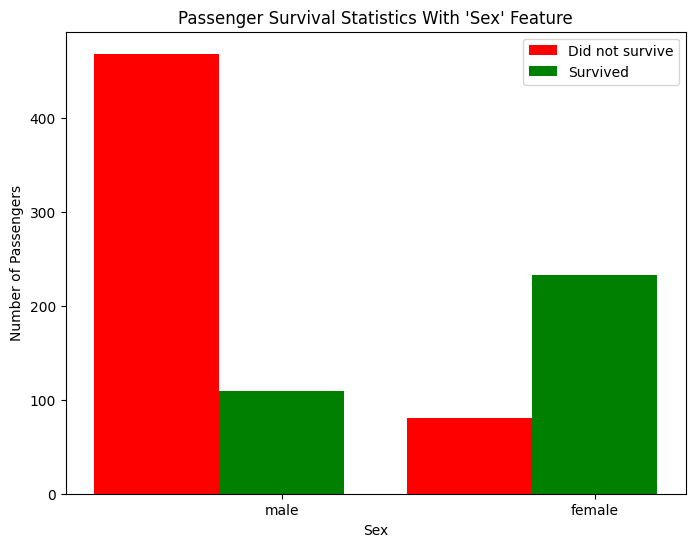

In [8]:
survival_stats(data, outcome, 'Sex')

In [9]:
def predictions_1(data):
  """ Model with one feature:
            - Predict a passenger survived if they are female. """

  predictions = []
  for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)

    # Return our predictions
  return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [10]:
print(accuracy_score(outcome, predictions))

Predictions have an accuracy of 78.68%.


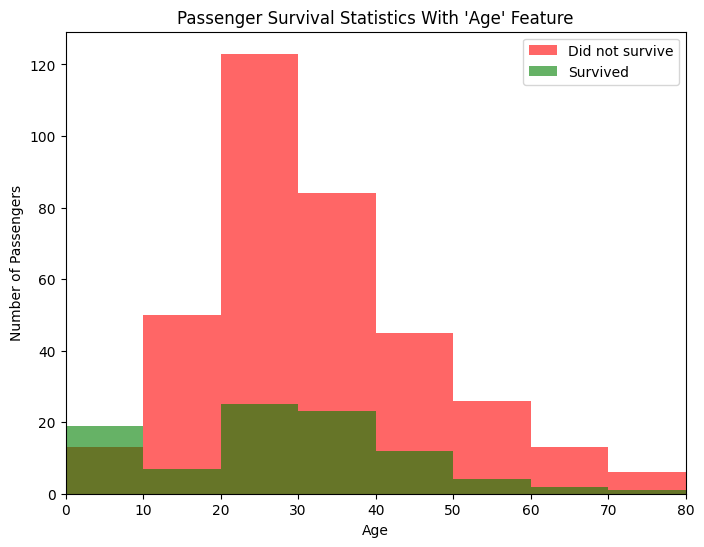

In [11]:
survival_stats(data, outcome, 'Age', ["Sex == 'male'"])

In [12]:
def predictions_2(data):
 predictions = []
 for _, passenger in data.iterrows():
    if passenger['Sex'] == 'male' and passenger['Age'] < 10 or passenger['Sex'] == 'female':
      predictions.append(1)
    else:
      predictions.append(0)

 return pd.Series(predictions)

predictions = predictions_2(data)

In [13]:
print(accuracy_score(outcome, predictions))

Predictions have an accuracy of 79.35%.


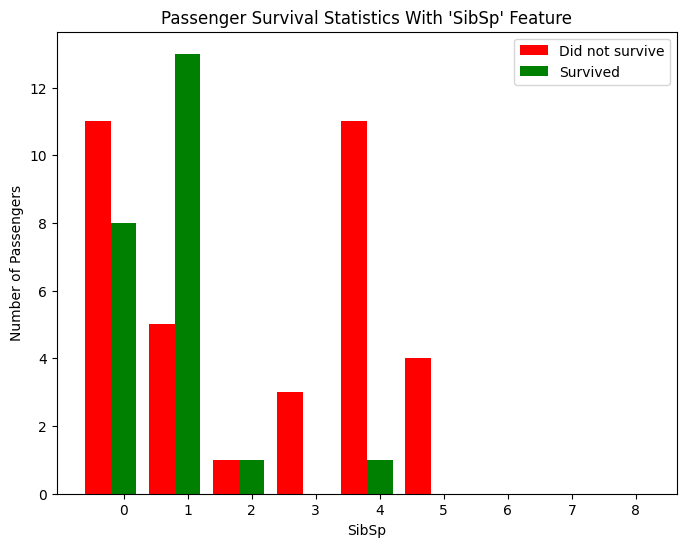

In [14]:
survival_stats(data, outcome, 'SibSp', ["Sex == 'male'", "Age < 18"])

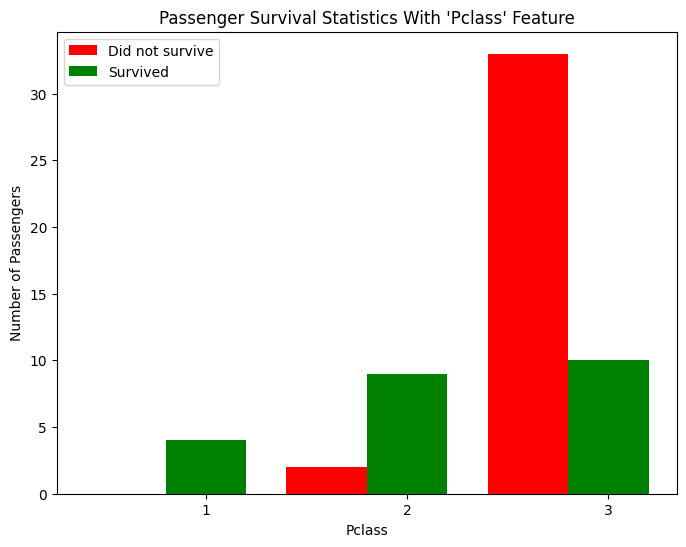

In [15]:
survival_stats(data, outcome, 'Pclass', ["Sex == 'male'", "Age < 18"])

In [22]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """

    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10 and passenger['Pclass'] in [1, 2]:
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 18 and passenger['Pclass'] == 1 and passenger['SibSp'] <= 1:
            predictions.append(1)
        else:
            predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)
predictions = predictions_3(data)

In [23]:
print(accuracy_score(outcome, predictions))

Predictions have an accuracy of 80.13%.


In [137]:
data1 = full_data
data1['Age'].interpolate(method = 'linear', axis = 0, inplace = True)
print(data1.isnull().sum())
outcomes = data1['Survived']
data1.drop(['Survived'], axis=1, inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [138]:
model = DecisionTreeClassifier()
features = data1
survival = outcomes
print(features.shape)
print(survival.shape)

(891, 11)
(891,)


In [139]:
features.drop(['Name','Ticket','Embarked','Cabin','PassengerId'], axis = 1, inplace = True)
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [140]:
Sex_bin = []
for sex in features['Sex']:
  if sex == 'male':
    Sex_bin.append(1)
  elif sex == 'female':
     Sex_bin.append(0)

features['Sex_bin'] = Sex_bin
features.drop(['Sex'], axis = 1, inplace =True)
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_bin
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [141]:
# Split data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(features, survival, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()


model.fit(X_train,Y_train)


y_pred = model.predict(X_test)
print(y_pred)
print(accuracy_score(Y_test, y_pred))


[0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]
Predictions have an accuracy of 81.01%.


In [151]:
print("Enter values for prediction:")
pclass = float(input("Pclass (1, 2, or 3): "))
age = float(input("Age: "))
sibsp = float(input("SibSp (number of siblings/spouses): "))
parch = float(input("Parch (number of parents/children): "))
fare = float(input("Fare: "))
sex_bin = float(input("Sex (1 for male, 0 for female): "))

# Create input array for prediction
user_input = np.array([[pclass, age, sibsp, parch, fare, sex_bin]])

# Make prediction
prediction = model.predict(user_input)

if prediction[0] == 1:
  result = "The passenger is predicted to survive."
else:
  result = "The passenger is predicted to not survive."
# Print the prediction
print(f"Predicted outcome: {result}")

Enter values for prediction:
Pclass (1, 2, or 3): 3
Age: 30
SibSp (number of siblings/spouses): 4
Parch (number of parents/children): 0
Fare: 2.2
Sex (1 for male, 0 for female): 1
Predicted outcome: The passenger is predicted to not survive.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
